

<br><br>


# ➩  __Quantitative Trade Analytics with Python   📈📊__            
#### _________   _by __Ramesh Sabhavath__ 👨🏼‍💻_


<br><br>



### _I am conducting walk-forward testing on a trading algorithm that I developed_
### _The objective of this analysis is to derive meaningful insights into the performance of the trading account_.

In [1]:
# Importing required libraries / modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis, geom, rv_histogram, powerlaw, expon
from datetime import timedelta
import random 

In [6]:
df.shape

(1139, 17)

### Data importing from my local system
### _Thisdata contains information on 1139+0 = 1140 Trades performed by my trading algorithm._

In [2]:
import pandas as pd

df = pd.read_excel("C:/Users/rameshsabhavath/OneDrive/Documents/TradingReports.xlsx")
df.head()

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,Lots,Symbol,Take Profit,Stop Loss,Profit,Swap,Commission
0,5445.0,157,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,0.01,EURUSD,1,0,1,45,2861
1,5287.0,136,Kite Mobile,01:44:00,2019-04-02 01:34:00,11163.0,2019-01-06 01:34:00,17657.0,08:23:00,TCS,0.01,AUDCAD,1,1,1,41,2669
2,3086.0,367,Kite API,14:52:00,2019-04-02 14:45:00,15925.0,2018-09-09 14:45:00,19973.0,04:12:00,RELIANCE,0.01,USDINR,1,1,1,27,2509
3,3603.0,25,Pi / Nest,04:00:00,2019-04-03 03:56:00,17202.0,2018-05-14 03:56:00,19188.0,00:01:00,AAPL,0.01,XAUUSD,1,1,1,40,2792
4,2879.0,136,Pending,17:08:00,2019-04-03 17:07:00,16533.0,2018-01-15 17:07:00,24624.0,19:50:00,MSFT,0.01,AUDCAD,1,1,1,34,3769


In [3]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Ticket,1134.0,3998.669312,2365.0,3162.25,3996.5,4857.25,5672.0,957.250657
Magic,1139.0,243.561896,23.0,140.5,242.0,343.0,456.0,122.291278
Open Datetime,1139,2020-02-08 01:42:00,2019-04-01 12:23:00,2019-09-04 19:02:30,2020-02-08 01:42:00,2020-07-13 08:21:30,2020-12-16 15:01:00,NaN
Open Price,1126.0,15571.540853,11010.0,13321.25,15628.5,17896.5,19999.0,2593.839066
Close Datetime,1139,1999-08-05 03:02:54.890254720,1901-04-17 11:07:00,1991-04-15 12:44:30,2019-01-06 01:34:00,2019-05-04 12:23:00,2019-05-04 12:23:00,NaN
Close Price,1127.0,20874.56433,16779.0,18901.5,20775.0,22828.5,24994.0,2291.581155
Lots,1139.0,0.01,0.01,0.01,0.01,0.01,0.01,0.0
Take Profit,1139.0,0.847234,-1.0,1.0,1.0,1.0,1.0,0.531453
Stop Loss,1139.0,0.923617,0.0,1.0,1.0,1.0,1.0,0.265726
Profit,1139.0,0.923617,0.0,1.0,1.0,1.0,1.0,0.265726


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ticket          1134 non-null   float64       
 1   Magic           1139 non-null   int64         
 2   Comment         1117 non-null   object        
 3   Open Time       1139 non-null   object        
 4   Open Datetime   1139 non-null   datetime64[ns]
 5   Open Price      1126 non-null   float64       
 6   Close Datetime  1139 non-null   datetime64[ns]
 7   Close Price     1127 non-null   float64       
 8   Closing Time    1139 non-null   object        
 9   Type            1096 non-null   object        
 10  Lots            1139 non-null   float64       
 11  Symbol          1120 non-null   object        
 12  Take Profit     1139 non-null   int64         
 13  Stop Loss       1139 non-null   int64         
 14  Profit          1139 non-null   int64         
 15  Swap

In [5]:
df.isnull().sum()

Ticket             5
Magic              0
Comment           22
Open Time          0
Open Datetime      0
Open Price        13
Close Datetime     0
Close Price       12
Closing Time       0
Type              43
Lots               0
Symbol            19
Take Profit        0
Stop Loss          0
Profit             0
Swap               0
Commission         0
dtype: int64

# Data preparation

In [ ]:
my data has so many null values

replacing 'Null' values with theire appropriate validations. 

In [6]:
df['Ticket'] = df['Ticket'].mean().round()
df['Ticket']

0       3999.0
1       3999.0
2       3999.0
3       3999.0
4       3999.0
         ...  
1134    3999.0
1135    3999.0
1136    3999.0
1137    3999.0
1138    3999.0
Name: Ticket, Length: 1139, dtype: float64

In [7]:
df['Ticket'].fillna(34837)
df['Ticket'].isnull().sum()

0

In [ ]:
In organizations, if someone leaves a text field incomplete, they cannot type the remaining similar values manually each time. 
so we should use they use the ffill or bfill

In [8]:
df['Comment'] = df['Comment'].ffill()
df['Comment'].isnull().sum()

0

In [9]:
df['Open Price'].mean()

15571.540852575488

In [10]:

df['Open Price'] = df['Open Price'].fillna(20182)
df['Open Price']
df['Close Price'].ffill()
df.isnull().sum()


Ticket             0
Magic              0
Comment            0
Open Time          0
Open Datetime      0
Open Price         0
Close Datetime     0
Close Price       12
Closing Time       0
Type              43
Lots               0
Symbol            19
Take Profit        0
Stop Loss          0
Profit             0
Swap               0
Commission         0
dtype: int64

In [11]:
df['Type'].mode()

0     AAPL
1      IMB
2     MSFT
Name: Type, dtype: object

In [12]:
df['Type'] = df['Type'].fillna('FLKRT')
df['Type']
df.isnull().sum()

Ticket             0
Magic              0
Comment            0
Open Time          0
Open Datetime      0
Open Price         0
Close Datetime     0
Close Price       12
Closing Time       0
Type               0
Lots               0
Symbol            19
Take Profit        0
Stop Loss          0
Profit             0
Swap               0
Commission         0
dtype: int64

In [13]:

d = df['Symbol'].ffill()
d
df['Close Price'] = df['Close Price'].ffill()
df['Close Price']

0       16779.0
1       17657.0
2       19973.0
3       19188.0
4       24624.0
         ...   
1134    21032.0
1135    21032.0
1136    24420.0
1137    19664.0
1138    19595.0
Name: Close Price, Length: 1139, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Ticket          1139 non-null   float64       
 1   Magic           1139 non-null   int64         
 2   Comment         1139 non-null   object        
 3   Open Time       1139 non-null   object        
 4   Open Datetime   1139 non-null   datetime64[ns]
 5   Open Price      1139 non-null   float64       
 6   Close Datetime  1139 non-null   datetime64[ns]
 7   Close Price     1139 non-null   float64       
 8   Closing Time    1139 non-null   object        
 9   Type            1139 non-null   object        
 10  Lots            1139 non-null   float64       
 11  Symbol          1139 non-null   object        
 12  Take Profit     1139 non-null   int64         
 13  Stop Loss       1139 non-null   int64         
 14  Profit          1139 non-null   int64         
 15  Swap

In [14]:
df['Symbol'] = df['Symbol'].ffill()
df['Symbol']

0             EURUSD 
1             AUDCAD 
2             USDINR 
3             XAUUSD 
4             AUDCAD 
            ...      
1134    ETHUSDT ether
1135          BNBUSDT
1136              CL 
1137          USDINR 
1138          EURUSD 
Name: Symbol, Length: 1139, dtype: object

In [16]:
df.isnull().sum()

Ticket            0
Magic             0
Comment           0
Open Time         0
Open Datetime     0
Open Price        0
Close Datetime    0
Close Price       0
Closing Time      0
Type              0
Lots              0
Symbol            0
Take Profit       0
Stop Loss         0
Profit            0
Swap              0
Commission        0
dtype: int64


## I cleand the data there is no mising values left. ready to use... 


In [ ]:
The names of columns are fairly self explanatory.
However I feel I should provide more information on these:

'Ticket' is generated by the broker .
'Magic' column is used to distinguish between trading algorithms.
'Comment' will be used to determine the reason why a trade was closed.

In [17]:
df.loc[df['Magic'] == 157, 'Magic'] = 345
df.head(1)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,Lots,Symbol,Take Profit,Stop Loss,Profit,Swap,Commission
0,3999.0,345,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,0.01,EURUSD,1,0,1,45,2861


In [18]:
df.isna().sum()

Ticket            0
Magic             0
Comment           0
Open Time         0
Open Datetime     0
Open Price        0
Close Datetime    0
Close Price       0
Closing Time      0
Type              0
Lots              0
Symbol            0
Take Profit       0
Stop Loss         0
Profit            0
Swap              0
Commission        0
dtype: int64

In [19]:
df['Commission'][0]

2861

##### I expect that all open prices are positive, so I count how many are negative.

In [20]:
df[df['Open Price'] <= 0]['Open Price'].count()

0

##### The same should apply to close prices.

In [21]:
df[df['Close Price'] <= 0]['Close Price'].count()

0

##### Lots also should be positive.

In [22]:
df[df['Lots'] <= 0]['Lots'].count()

0

## Transformations

For aesthetic reasons, I strip the names of symbols from "+" and ".".

In [23]:
df['Symbol'] = df['Symbol'].apply(lambda x: x.replace("+", ""))
df['Symbol'] = df['Symbol'].apply(lambda x: x.replace(".", ""))

Convert columns with timestamps from strings to datetimes.

In [24]:
df['Open Datetime'] = pd.to_datetime(df['Open Datetime'])
df['Close Datetime'] = pd.to_datetime(df['Close Datetime'])

Chronological order is of utmost importance since I shall be performing running calculations later.

In [33]:
df.head(2)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,Lots,Symbol,Take Profit,Stop Loss,Profit,Swap,Commission
0,3999.0,345,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,0.01,EURUSD,1,0,1,45,2861
1,3999.0,136,Kite Mobile,01:44:00,2019-04-02 01:34:00,11163.0,2019-01-06 01:34:00,17657.0,08:23:00,TCS,0.01,AUDCAD,1,1,1,41,2669


In [34]:
df.shape

(1139, 17)

In [25]:
df = df.sort_values('Open Datetime')
df = df.reset_index(drop=True)

## New columns

In this section I add new columns to the dataset.<br>
I shall definitely want to perform aggregations by time so I add the necessary columns. <br> 
I start with extracting the date, hour and day of week from the "Open Datetime" column.

In [26]:

df['Open Date'] = df['Open Datetime'].dt.date
df['Open Hour'] = df['Open Datetime'].dt.hour    
df['Open Day'] = df['Open Datetime'].dt.day_name()
df['Open Datetime Seconds'] = pd.to_datetime(df['Open Datetime'], origin='unix')

df.head(1)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,...,Symbol,Take Profit,Stop Loss,Profit,Swap,Commission,Open Date,Open Hour,Open Day,Open Datetime Seconds
0,3999.0,345,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,...,EURUSD,1,0,1,45,2861,2019-04-01,12,Monday,2019-04-01 12:23:00


### we can notice there are 4 columns added at the end

#### _I extract the same information as above for the "Close Datetime" column._

In [27]:

df['Close Date'] = df['Close Datetime'].dt.date
df['Close Hour'] = df['Close Datetime'].dt.hour    
df['Close Day'] = df['Close Datetime'].dt.day_name()
df['Close Datetime Seconds'] = pd.to_datetime(df['Close Datetime'], origin='unix')

df.tail(2)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,...,Swap,Commission,Open Date,Open Hour,Open Day,Open Datetime Seconds,Close Date,Close Hour,Close Day,Close Datetime Seconds
1137,3999.0,331,Algo Order,14:00:00,2020-12-16 01:50:00,17547.0,2019-01-06 01:34:00,19664.0,18:31:00,AMZN,...,45,3950,2020-12-16,1,Wednesday,2020-12-16 01:50:00,2019-01-06,1,Sunday,2019-01-06 01:34:00
1138,3999.0,299,Fully Executed,03:08:00,2020-12-16 15:01:00,17498.0,2019-05-04 12:23:00,19595.0,14:20:00,SBI,...,33,3219,2020-12-16,15,Wednesday,2020-12-16 15:01:00,2019-05-04,12,Saturday,2019-05-04 12:23:00


### I calculate the duration of individual trades. The final value is in minutes.

In [28]:
df['Duration'] = (df['Close Datetime'] - df['Open Datetime'])
df['Duration'] = df['Duration'].apply(lambda x: x.total_seconds() / 60)
df.head(1)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,...,Commission,Open Date,Open Hour,Open Day,Open Datetime Seconds,Close Date,Close Hour,Close Day,Close Datetime Seconds,Duration
0,3999.0,345,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,...,2861,2019-04-01,12,Monday,2019-04-01 12:23:00,2019-05-04,12,Saturday,2019-05-04 12:23:00,47520.0


### Now I create a new column that is equall to the net profit from a trade.

In [29]:
df['Profit'] = df['Profit'] + df['Swap'] + df['Commission']
df['Profit']

0       2907
1       2711
2       2537
3       2833
4       3804
        ... 
1134      23
1135      37
1136    3678
1137    3996
1138    3253
Name: Profit, Length: 1139, dtype: int64

### I need a 'Profit Per Lot' column because different trades have different lot sizes.

In [30]:
df['Profit Per Lot'] = df['Profit'] / ( df['Lots'] / 0.01)

df['Profit Per Lot'].head(1)

0    2907.0
Name: Profit Per Lot, dtype: float64

#### I add two columns to describe the direction of a trade.

In [31]:
df['Order Type'] = df['Type'].apply(lambda x: "Buy" if x == 0 else "Sell")
df['Direction'] = df['Type'].apply(lambda x: 1 if x == 0 else -1)

#### _I extract the reason why a trade was closed from the 'Comment' column. The reason for closure is added by my broker to the end of my comment_:

In [32]:
df['Comment'][0]

'Kite Web'

In order to extract the reason for closure I search for specific strings in the comment.

In [33]:
df['Stop Loss Hit'] = df['Comment'].apply(lambda x: 1 if "[[sl]]" in x else 0)
df['Take Profit Hit'] = df['Comment'].apply(lambda x: 1 if "[[tp]]" in x else 0)

#### I calculate the difference between the 'Take profit' and the 'Stop loss' columns. I define a helper function first :

It is then applied to a subset of the original data.

In [34]:
df['Stop Loss'] = [random.randint(1,5) for i in range (1139)]
df['Take Profit'] = [random.randint(1,5)for i in range (1139)]
df.head(1)

,Ticket,Magic,Comment,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Type,...,Close Date,Close Hour,Close Day,Close Datetime Seconds,Duration,Profit Per Lot,Order Type,Direction,Stop Loss Hit,Take Profit Hit
0,3999.0,345,Kite Web,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,INFY,...,2019-05-04,12,Saturday,2019-05-04 12:23:00,47520.0,2907.0,Sell,-1,0,0


## there are so many additional columns added, we dont have any use of them so, im dropping those columns for better representation of data analysis.

I delete unwanted columns:

* Ticket - Generated by the broker for their internal purposes.
* Commission - Constant column equall to zero.
* Comment - Information was extracted.
* Type - Information was extracted.
* Take Profit - Information was extracted and is not relevant to this analysis.
* Stop Loss - Information was extracted and is not relevant to this analysis.

In [35]:
unwanted = ['Ticket', 
            'Commission',             
            'Comment', 
            'Type', 
            'Take Profit', 
            'Stop Loss']

df.drop(unwanted, axis=1, inplace=True)

In [52]:
df.head(2)

,Magic,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Lots,Symbol,Profit,...,Open Date,Open Hour,Open Day,Open Datetime Seconds,Close Date,Close Hour,Close Day,Close Datetime Seconds,Duration,Profit Per Lot
0,345,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,0.01,EURUSD,2907,...,2019-04-01,12,Monday,2019-04-01 12:23:00,2019-05-04,12,Saturday,2019-05-04 12:23:00,47520.0,2907.0
1,136,01:44:00,2019-04-02 01:34:00,11163.0,2019-01-06 01:34:00,17657.0,08:23:00,0.01,AUDCAD,2711,...,2019-04-02,1,Tuesday,2019-04-02 01:34:00,2019-01-06,1,Sunday,2019-01-06 01:34:00,-123840.0,2711.0


### after dropping few unnecessary columns, there's 21 columns left 

In [53]:
df.shape

(1139, 21)

In [30]:
df.head()      # The clean data looks like this

,Magic,Open Datetime,Open Price,Close Datetime,Close Price,Lots,Symbol,Profit,Swap,Open Date,...,Close Hour,Close Day,Close Datetime Seconds,Duration,Profit Per Lot,Order Type,Direction,Stop Loss Hit,Take Profit Hit,Stops Distance
0,4444,2020-05-19 11:31:00,1.09543,2020-05-19 11:39:00,1.09538,0.01,EURUSD,0.21,0.0,2020-05-19,...,11,Tuesday,1589888340000000000,8.0,0.21,Sell,-1,1,0,0.457634
1,4444,2020-05-19 12:17:00,1.09548,2020-05-19 12:23:00,1.09539,0.01,EURUSD,0.38,0.0,2020-05-19,...,12,Tuesday,1589890980000000000,6.0,0.38,Sell,-1,1,0,0.452107
2,4444,2020-05-19 17:40:00,1.09250,2020-05-19 21:59:00,1.09257,0.01,EURUSD,0.30,0.0,2020-05-19,...,21,Tuesday,1589925540000000000,259.0,0.30,Buy,1,1,0,0.908866
3,4444,2020-05-20 13:03:00,1.09569,2020-05-20 13:20:00,1.09557,0.01,EURUSD,0.50,0.0,2020-05-20,...,13,Wednesday,1589980800000000000,17.0,0.50,Sell,-1,1,0,0.452949
4,4444,2020-05-20 13:57:00,1.09630,2020-05-20 14:29:00,1.09628,0.01,EURUSD,0.09,0.0,2020-05-20,...,14,Wednesday,1589984940000000000,32.0,0.09,Sell,-1,1,0,0.457257


### I'm going to start the analysis by computing basic statistics the should interest any algorithmic trade


In [54]:
start = df['Open Date'].min()
str(start)

'2019-04-01'

The last trade in the data was closed on:

In [55]:
stop = df['Close Date'].max()
str(stop)

'2019-05-04'

That means the algorithms traded for nearly a month.

In [56]:
str(stop - start)

'33 days, 0:00:00'

Trades over the period in question:

In [57]:
df.shape[0]

1139

# Calculating Profit

#### Total profit

Over the period in question the algorithms achieved a profit of:

In [39]:
np.round(df['Profit'].sum(),2) 

3223025

## Total profit by market

As can be seen the bulk of the profit comes from 'USDCHF'.

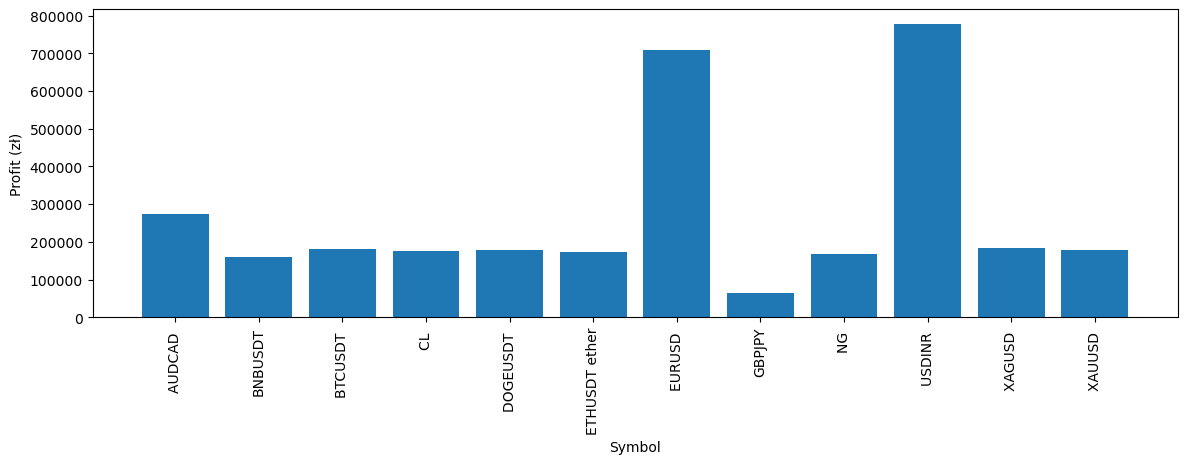

In [38]:
# showing profit using bar chart


df_symbol = df[['Symbol', 'Profit']].groupby(['Symbol'], as_index=False).sum()

plt.figure(figsize= [ 14, 4])
plt.bar(df_symbol['Symbol'], df_symbol['Profit'])
plt.xticks(df_symbol['Symbol'], rotation=90)
plt.ylabel('Profit (zł)')
plt.xlabel('Symbol')
plt.show()



### The most money was made by shorting __'USDINR'__. The most money was lost buying '__GBPJPY__'.

### Total profit by market and trade direction

In [37]:
df.columns

Index(['Magic', 'Open Time', 'Open Datetime', 'Open Price', 'Close Datetime',
       'Close Price', 'Closing Time', 'Lots', 'Symbol', 'Profit', 'Swap',
       'Open Date', 'Open Hour', 'Open Day', 'Open Datetime Seconds',
       'Close Date', 'Close Hour', 'Close Day', 'Close Datetime Seconds',
       'Duration', 'Profit Per Lot', 'Order Type', 'Direction',
       'Stop Loss Hit', 'Take Profit Hit'],
      dtype='object')

In [36]:
df_mkt = df[['Symbol', 'Close Day', 'Duration', 'Profit']]

df_mkt = df_mkt.groupby(['Symbol', 'Close Day'], as_index=False).agg({
    'Duration': 'sum',
    'Profit': 'sum' })

df_mkt['Duration'] = np.abs(df_mkt['Duration'])    # converting into postive using abs

df_mkt = df_mkt.rename(columns={"Duration": "Number of Trades"})        # Renaming Duration column

df_mkt = df_mkt.sort_values('Profit', ascending=False)           # Sort by Profit : asc

df_mkt       # calling


,Symbol,Close Day,Number of Trades,Profit
64,USDINR,Saturday,443433434.0,322529
44,EURUSD,Saturday,285317006.0,278880
45,EURUSD,Sunday,433804750.0,270169
65,USDINR,Sunday,338978078.0,266110
3,AUDCAD,Sunday,126678508.0,116780
...,...,...,...,...
50,GBPJPY,Monday,41935680.0,2438
53,GBPJPY,Thursday,3722400.0,2394
36,ETHUSDT ether,Monday,51484320.0,2084
25,CL,Thursday,21201120.0,2065


## Best days
The 3 best days were :

In [40]:
df_cdate = df[['Close Date', 'Profit']].groupby(['Close Date'], as_index=False).sum()
df_cdate.sort_values('Profit', ascending=False).head(3)

,Close Date,Profit
364,2019-05-04,1096800
363,2019-01-06,1093444
2,1901-12-10,12068


## Worst days
The worst 3 days were :

In [39]:
df_cdate.sort_values('Profit', ascending=True).head(3)

,Close Date,Profit
17,2020-06-12,-87.14
13,2020-06-08,-64.77
4,2020-05-26,-32.51


### Costs

Amount of swap paid :

In [41]:
np.sum(df['Swap'])

38860

## Profit Per Lot
Since the trades vary in lot size it makes more sense to look at 'Profit Per Lot' than at 'Profit'.

#### Profit Per Lot histogram
As can be seen the distribution of 'Profit Per Lot' is nothing like a normal distribution:

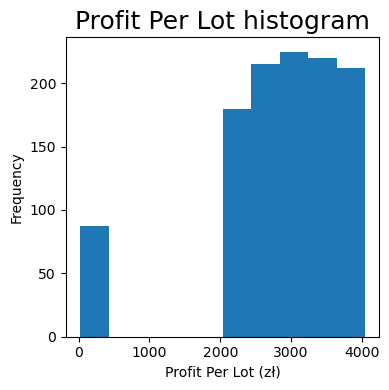

In [42]:
width = 400
height = 400
dpi = 100

plt.figure(figsize=(width/dpi, height/dpi))
plt.hist(df['Profit Per Lot'])
plt.ylabel('Frequency')
plt.xlabel('Profit Per Lot (zł)')
plt.title('Profit Per Lot histogram', fontsize=18)
plt.tight_layout()
plt.show()

The mean of the distribution is :

In [43]:
np.round(np.mean(df['Profit Per Lot']), 2)

2829.7

However the median is negative so the most frequent trades were small losses:

In [44]:
np.round(np.quantile(df['Profit Per Lot'], 0.5), 2)

2975.0

Standard deviation is:

In [45]:
np.round(np.std(df['Profit Per Lot']), 2)

969.75

Interquartile range:

In [46]:
np.round(np.quantile(df['Profit Per Lot'], 0.75) - np.quantile(df['Profit Per Lot'], 0.25))

1054.0

The distribution exhibits positive skew of:

In [47]:
np.round(skew(df['Profit Per Lot']), 2)

-1.6

The distribution is also leptokurtic: 

In [85]:
np.round(kurtosis(df['Profit Per Lot']), 2)

2.57

##### Comment
This is to be expected given the design of the algorithms. They have a predifined maximum loss per trade (they will take small losses more frequently) but can hold winning trades for up to a week (hence the big wins).

## Profit Per Lot by symbol
Given the presence of outliers I think it is apropriate that for the rest of this section I analyze the median of 'Profit Per Lot'.<br>
As can be seen by far the worst market was __'GBPJPY'__.

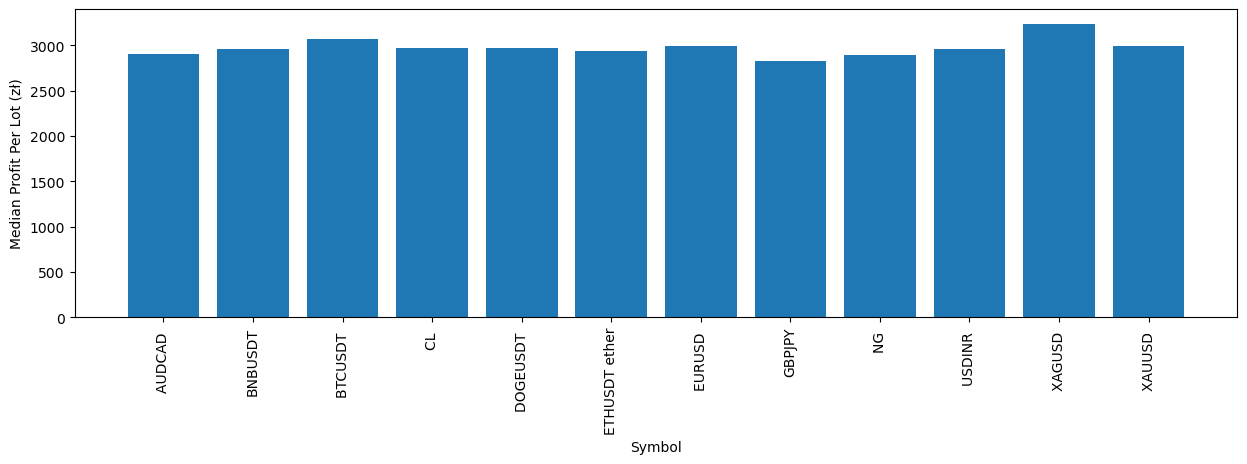

In [48]:
df_ppl = df[['Symbol', 'Profit Per Lot']].groupby(['Symbol'], as_index=False).quantile(0.5)
df_ppl['Symbol'] = df_ppl['Symbol'].astype('str')

plt.figure(figsize= [15,4])
plt.bar(df_ppl['Symbol'], df_ppl['Profit Per Lot'])
plt.xticks(df_ppl['Symbol'], rotation=90)
plt.ylabel('Median Profit Per Lot (zł)')
plt.xlabel('Symbol')
plt.show()

### Profit Per Lot by day of week
As can be seen no particular day of the week is better for trading.

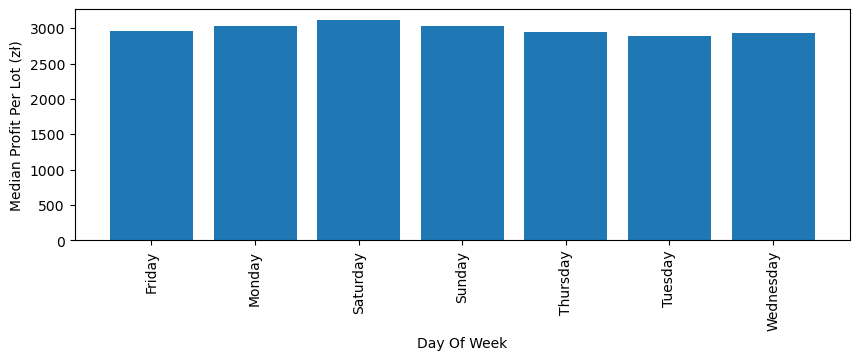

In [49]:
df_day = df[['Open Day', 'Profit Per Lot']].groupby(['Open Day'], as_index=False).quantile(0.5)
df_day.rename(columns={"Open Day": "Day Of Week"}, inplace=True)

plt.figure(figsize= [ 10,3])
plt.bar(df_day['Day Of Week'], df_day['Profit Per Lot'])
plt.xticks(df_day['Day Of Week'], rotation=90)
plt.ylabel('Median Profit Per Lot (zł)')
plt.xlabel('Day Of Week')
plt.show()

### Profit Per Lot by open hour
The median profit per lot is positive for 2pm and 4pm. 
This is very interesting because:
* Around 2pm typically macroeconomic news is released.
* The european session closes at 5pm.

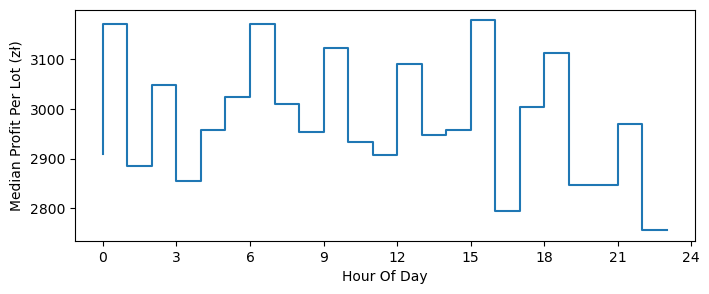

In [50]:
df_hour = df[['Open Hour', 'Profit Per Lot']].groupby(['Open Hour'], as_index=False).quantile(0.5)
df_hour.rename(columns={"Open Hour": "Hour Of Day"}, inplace=True)

plt.figure(figsize= [8,3])
plt.step(df_hour['Hour Of Day'], df_hour['Profit Per Lot'])
plt.ylabel('Median Profit Per Lot (zł)')
plt.xlabel('Hour Of Day')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))        

plt.show()

## Trades

#### Best trades

Here is a table with the 3 best trades.

In [51]:
df[['Symbol', 'Profit Per Lot', 'Profit']].sort_values('Profit Per Lot', ascending=False).head(3)

,Symbol,Profit Per Lot,Profit
480,USDINR,4045.0,4045
486,XAGUSD,4039.0,4039
669,AUDCAD,4036.0,4036


#### Worst trades

Here is a table with the 3 worst trades.

In [52]:
df[['Symbol', 'Profit Per Lot', 'Profit']].sort_values('Profit Per Lot', ascending=True).head(3)

,Symbol,Profit Per Lot,Profit
367,EURUSD,23.0,23
1055,EURUSD,23.0,23
1080,DOGEUSDT,23.0,23


#### Average win

A profitable trade on average nets:

In [53]:
avg_profit = np.round(df[df['Profit Per Lot'] >= 0]['Profit Per Lot'].mean(), 2)
avg_profit

2829.7

#### Average loss
A unprofitable trade on average loses:

In [54]:
avg_loss = np.round(df[df['Profit Per Lot'] < 0]['Profit Per Lot'].mean(), 2)
avg_loss

nan

#### Profit / loss ratio

In [55]:
np.round(np.abs(avg_profit / avg_loss), 2)

nan

#### Percent of winning trades

As can be seen winning trades occur 40% of the time.

In [56]:
win_prob = np.round(df[df['Profit Per Lot'] >= 0]['Profit Per Lot'].count() / df.shape[0] * 100, 2)
win_prob

100.0

#### Percent of losing trades

In [57]:
loss_prob = np.round(df[df['Profit Per Lot'] < 0]['Profit Per Lot'].count() / df.shape[0] * 100, 2)
loss_prob

0.0

#### Probability of observing consecutive losses
I use the well known formula to compute the probability of a series of 10 losses happening. This calculation should be taken with a grain of salt because the probabilities are most surely not fixed.

In [58]:
X = geom(loss_prob / 100)
df_geom = pd.DataFrame([np.arange(1,11), np.round(np.power(loss_prob/100, np.arange(1,11)),2)]).T
df_geom.columns = ['Losses', 'Probability']
df_geom['Losses'] = df_geom['Losses'].astype('int')
df_geom

,Losses,Probability
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
5,6,0.0
6,7,0.0
7,8,0.0
8,9,0.0
9,10,0.0


#### Trade duration

Next I inspect the histogram of the duration of individual trades. <br>

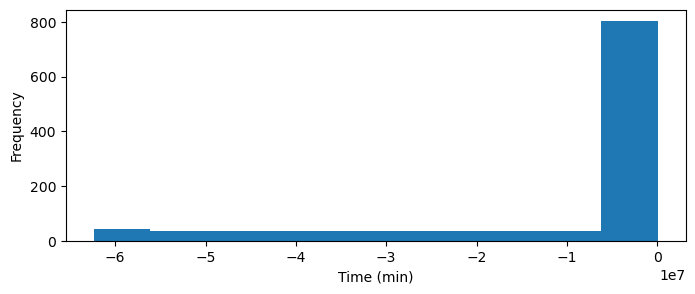

In [59]:
plt.figure(figsize=[8,3])
plt.hist(df['Duration'])
plt.ylabel('Frequency')
plt.xlabel('Time (min)')
plt.show()

I wonder what distribution does this follow ?

I create a random discrete random variable from binned data, and fit both a exponential and power law distribution.

In [61]:
dur = df['Duration'].to_numpy()

h = np.histogram(dur, bins=1000)
D_emp = rv_histogram(h)

a, loc, scale = powerlaw.fit(dur)
D_power = powerlaw(a=a, loc=loc, scale=scale)

loc, scale = expon.fit(dur)
D_exp = expon(loc=loc, scale=scale)

X = np.linspace(np.min(dur), np.max(dur), 1000)

Unfortunately, as can bee seen the cdf's do not match, but they could serve as a approximation if need be.

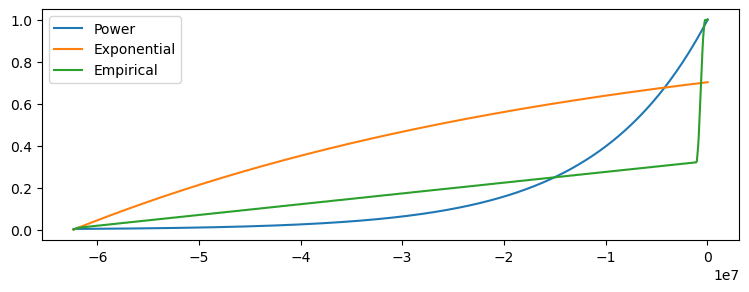

In [62]:
plt.figure(figsize= [9,3])
plt.plot(X, D_power.cdf(X), label="Power")
plt.plot(X, D_exp.cdf(X), label="Exponential")
plt.plot(X, D_emp.cdf(X), label="Empirical")         
plt.legend(loc='best')
plt.show()

In [63]:
df_dur = df['Duration'].to_frame()

df_dur

,Duration
0,47520.0
1,-123840.0
2,-295200.0
3,-466560.0
4,-637920.0
...,...
1134,-849474.0
1135,-1020834.0
1136,-851056.0
1137,-1022416.0


In [64]:
df_dur['Duration'] = df_dur['Duration'].apply(lambda x: timedelta(minutes=x))
df_dur['Duration']

0         33 days 00:00:00
1       -86 days +00:00:00
2      -205 days +00:00:00
3      -324 days +00:00:00
4      -443 days +00:00:00
               ...        
1134   -590 days +02:06:00
1135   -709 days +02:06:00
1136   -592 days +23:44:00
1137   -711 days +23:44:00
1138   -593 days +21:22:00
Name: Duration, Length: 1139, dtype: timedelta64[ns]

#### Longest trades
The longest trade took almost 4 days.

In [65]:
df_dur = df_dur.sort_values('Duration', ascending=False)
df_dur.head(3)

,Duration
0,33 days 00:00:00
1,-86 days +00:00:00
372,-172 days +15:48:00


#### Shortest trades
The shortest trade took 2 minutes.

In [66]:
df_dur = df_dur.sort_values('Duration', ascending=True)
df_dur.head(3)

,Duration
370,-43287 days +16:54:00
367,-43285 days +08:27:00
364,-43283 days +00:00:00


#### Trade duration vs Profit Per Lot

The scatter plot shows that there seems to be a minimal relationship between the duration of a trade and its profitability. This is to be expected - as mentioned earlier the algorithm will hold on to winning trades.

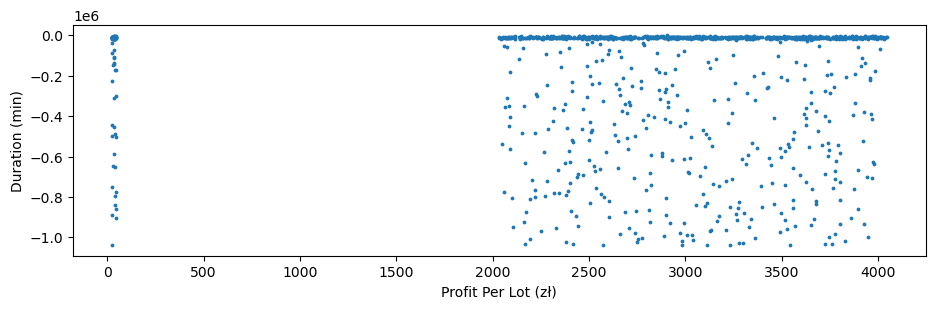

In [67]:
plt.figure(figsize=[11,3])
plt.scatter(df['Profit Per Lot'], df['Duration'] / 60, s=3)
plt.ylabel("Duration (min)")
plt.xlabel("Profit Per Lot (zł)")
plt.show()

#### Average number of Trades Per Day

In [68]:
df_open = df[['Open Date', 'Profit']]
df_open = df_open.groupby(['Open Date'], as_index=False)
df_open = df_open.count()
df_open = df_open.rename(columns={'Profit': 'Trades Per Day'})
df_open.head()

,Open Date,Trades Per Day
0,2019-04-01,1
1,2019-04-02,2
2,2019-04-03,2
3,2019-04-04,2
4,2019-04-05,2


The average number of trades per day is:

In [67]:
np.round(df_open['Trades Per Day'].mean(), 2)

4.84

#### Trades Per Day histogram

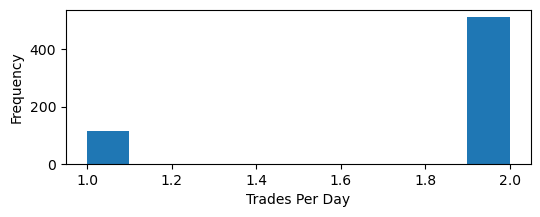

In [69]:
plt.figure(figsize=[6,2])
plt.hist(df_open['Trades Per Day'])
plt.ylabel('Frequency')
plt.xlabel('Trades Per Day')
plt.show()

## Time spent in trade by market

I calculate the percent of time spent in trades by summing up all trade durations. I then divide that number by number of minutes in the trading period. As can be seen almost half the trading period the algorithms had positions in 'GBPUSD' and 'USDCHF'. The least time was spent trading 'OILWTI'.

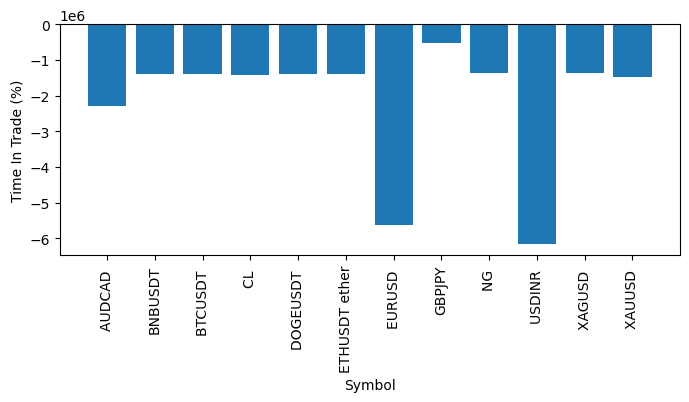

In [70]:
start = df['Open Date'].min()
stop = df['Close Date'].max()

total = (stop-start).total_seconds() / 60

df_time = df[['Symbol', 'Duration']].groupby('Symbol', as_index=False).sum() 
df_time['Percent'] = np.round(df_time['Duration'] / total * 100)

plt.figure(figsize=[8,3])
plt.bar(df_time['Symbol'], df_time['Percent'])
plt.xticks(df_time['Symbol'], rotation=90)
plt.ylabel('Time In Trade (%)')
plt.xlabel('Symbol')
plt.show()

## Orders

There are 5 ways a order can get closed.
1. By me. (Did not occur)
2. By the algorithm.
3. Market moves above/below take profit.
4. Market moves above/below stop loss.
5. Broker closes trades open longer than one year. (Did not occur)

So I have 3 situations to examine.

## Percent of stop loss  hits

In [71]:
df.head(1)

,Magic,Open Time,Open Datetime,Open Price,Close Datetime,Close Price,Closing Time,Lots,Symbol,Profit,...,Close Date,Close Hour,Close Day,Close Datetime Seconds,Duration,Profit Per Lot,Order Type,Direction,Stop Loss Hit,Take Profit Hit
0,345,12:36:00,2019-04-01 12:23:00,13227.0,2019-05-04 12:23:00,16779.0,12:34:00,0.01,EURUSD,2907,...,2019-05-04,12,Saturday,2019-05-04 12:23:00,47520.0,2907.0,Sell,-1,0,0


#### Percent of take profit hits

In [71]:
np.round(df['Take Profit Hit'].sum() / df.shape[0] * 100, 2)

11.96

#### Percent closed by algorithms
Specifically, this is the percent of trades closed because the trade triggered different logic than moving take profit and stop loss orders.

In [72]:
np.round(np.sum((df['Take Profit Hit'] == 0) & (df['Stop Loss Hit'] == 0)) / df.shape[0] * 100, 2)

3.26

#### Stop order distance

This histogram is very interesting as it shows a way I could potentially improve the logic of my algorithm.
Placing orders 10% away from the market for the type of strategy the algorithms trade seems pointless.

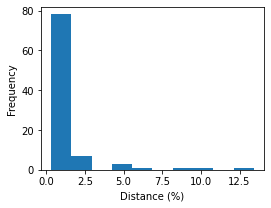

In [73]:
plt.figure(figsize=[3,3])
plt.hist(df['Stops Distance'])
plt.ylabel('Frequency')
plt.xlabel('Distance (%)')
plt.show()

### Drawdown

In trading drawdown refers to the difference between the high point in a equity curve and succeding low point. I am interested in the the difference between the high point and the low point as well as the duration of the drawdown.

#### Max drawdown

I define a helper function to locate the points in question.

In [74]:
def max_drawdown(arr):
    
    size = arr.shape[0]
    arr = np.cumsum(arr)
    start = np.argmax(arr)
    stop = np.argmin(arr[start:])
    
    return start, arr[start], start + stop, arr[start + stop]

In [72]:
def max_drawdown(arr):
    
    size = arr.shape[0]
    arr = np.cumsum(arr)
    start = np.argmax(arr)
    stop = np.argmin(arr[start:])
    
    return start, arr[start], start + stop, arr[start + stop]

In [73]:
d1, v1, d2, v2 = max_drawdown(df['Profit'])

#### Cumulative profit

I draw a plot of the cumulative profit over time and mark the high and low points.

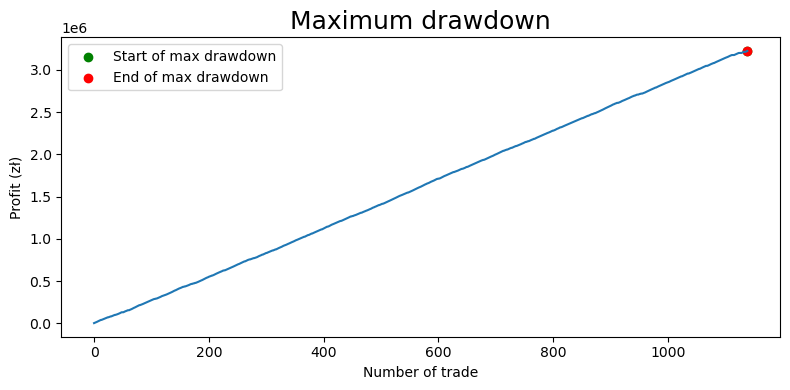

In [74]:
width = 800
height = 400
dpi = 100

plt.figure(figsize=(width/dpi, height/dpi))
plt.plot(np.cumsum(df['Profit']))
plt.ylabel("Profit (zł)")
plt.xlabel("Number of trade")
plt.scatter(d1, v1, c="green", label="Start of max drawdown")
plt.scatter(d2, v2, c="red", label="End of max drawdown")
plt.legend(loc='best')
plt.title('Maximum drawdown', fontsize=18)
plt.tight_layout()
plt.show()

#### Max drawdown duration
I find that the duration of the max drawdown was:

In [77]:
drawdown_dur = df.loc[d2, "Open Datetime"] - df.loc[d1, "Open Datetime"]
str(drawdown_dur)

'4 days 03:48:00'

#### Time in max drawdown
Percent of time spent in drawdown:

In [78]:
np.round(drawdown_dur.total_seconds() / total / 60 * 100, 2) 

14.85

#### Max drawdown amount
The difference between the high point in the equity curve and the low point is:

In [79]:
v1 - v2

243.01

# Monte Carlo

### Simulating trades

<b>Assumption</b>:<br>
* Future trades will be similar to the ones in the dataset. <br>
* The algorithms trade size is fixed at 0.01 lots.

The 'Profit Per Lot' column is sampled with replacement and summed up to simulate possible outcomes for the next 100 trades.

I shall answer the following questions:
1. What is the probability that over the next 100 trades the account will grow ?
2. How much can I expect to lose in the worst case ?
3. How much can I expect to gain in the best case ?

Below is a visual to explain the process. Each line represents a different 'future'. I am interested in the distribution of these 'futures'.

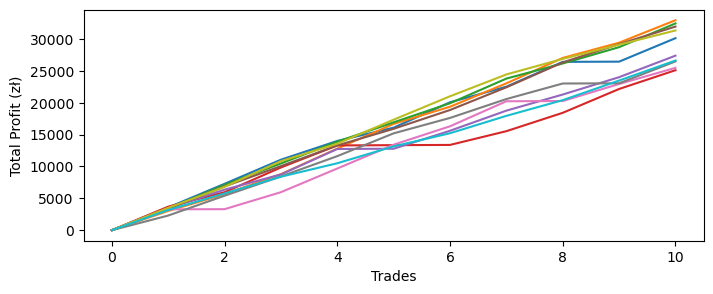

In [75]:
plt.figure(figsize=[8,3])
np.random.seed(12346)

for _ in range(10):
    
    X = np.random.choice(df['Profit Per Lot'], replace=True, size=10)
    X = np.hstack([np.array([0]), X])
    plt.plot(np.cumsum(X))
    plt.xlabel("Trades")
    plt.ylabel("Total Profit (zł)")

100000 samples are chosen with replacement and summed up to get the final profit.

In [76]:
nrows = 10**5 # Number of simulations
ncols = 10**2 # Number of trades

X = np.random.choice(df['Profit Per Lot'], replace=True, size=(nrows, ncols))
X = np.cumsum(X, axis=1)
X = X[:, ncols-1]
density, bins = np.histogram(X, density=True, bins=200)
X_unity = density / density.sum()
X_unity

array([1.000e-05, 1.000e-05, 0.000e+00, 1.000e-05, 0.000e+00, 1.000e-05,
       1.000e-05, 0.000e+00, 2.000e-05, 1.000e-05, 2.000e-05, 3.000e-05,
       0.000e+00, 1.000e-05, 4.000e-05, 3.000e-05, 4.000e-05, 7.000e-05,
       7.000e-05, 1.000e-05, 7.000e-05, 6.000e-05, 6.000e-05, 4.000e-05,
       8.000e-05, 1.000e-04, 1.300e-04, 8.000e-05, 1.400e-04, 2.000e-04,
       1.800e-04, 1.400e-04, 2.300e-04, 2.900e-04, 2.600e-04, 2.900e-04,
       3.300e-04, 2.900e-04, 3.500e-04, 4.600e-04, 4.500e-04, 3.900e-04,
       5.800e-04, 5.900e-04, 6.300e-04, 8.600e-04, 9.000e-04, 8.400e-04,
       9.400e-04, 1.300e-03, 1.170e-03, 1.190e-03, 1.430e-03, 1.440e-03,
       1.520e-03, 1.430e-03, 1.990e-03, 2.170e-03, 2.140e-03, 2.570e-03,
       2.410e-03, 2.900e-03, 3.190e-03, 2.760e-03, 3.420e-03, 3.420e-03,
       4.070e-03, 4.240e-03, 4.490e-03, 4.610e-03, 4.960e-03, 5.110e-03,
       5.290e-03, 5.640e-03, 5.810e-03, 6.780e-03, 6.770e-03, 7.120e-03,
       7.570e-03, 7.620e-03, 8.270e-03, 8.540e-03, 

### PDF from simulation

I use the data from the simulation to create a pdf.

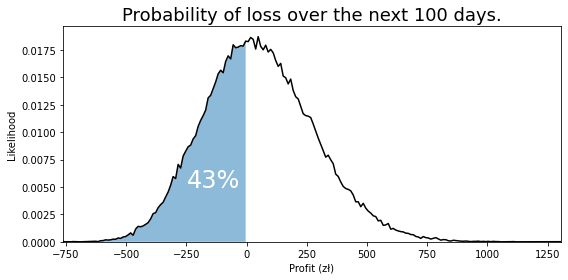

In [82]:
width = 800
height = 400
dpi = 100

loss_prob = int(100 - np.sum(X > 0) / X.shape[0] * 100)
mask = bins[1:] <= 0

plt.figure(figsize=(width/dpi, height/dpi))
plt.plot(bins[1:], X_unity, c='black')
plt.fill_between(x=bins[1:][mask], y1=0, y2=X_unity[mask], alpha=1/2)
plt.ylabel('Likelihood')
plt.xlabel('Profit (zł)')
plt.text(-250, 0.005, s=f'{loss_prob}%', color='white', fontsize=24)
plt.ylim(0)
plt.xlim(np.min(bins[1:]), np.max(bins[1:]))
plt.title('Probability of loss over the next 100 days.', fontsize=18)
plt.tight_layout()
plt.savefig('./img/probability_of_loss.png')
plt.savefig("C:/Users/rameshsabhavath/OneDrive/Documents/barplot.png")
plt.show()

### CDF from simulation

I use the data from the simulation to create a cdf.

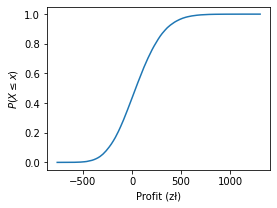

In [83]:
plt.figure(figsize=figsize)
plt.plot(bins[1:], np.cumsum(X_unity))
plt.ylabel(r"$P(X \leq x)$")
plt.xlabel("Profit (zł)")
plt.show()

### Probability of profit

From the simulated data I can calculate the probability of making money over the next 100 trades:

In [77]:
np.round(np.sum(X > 0) / X.shape[0] * 100, 2)

100.0

### Best case scenario

In the best case scenario I can expect to make:

In [78]:
alpha = 0.05
np.round(np.quantile(X, 1-alpha), 2)

298444.0

In [79]:
alpha = 0.05
np.round(np.quantile(X, 1-alpha), 2)

298444.0

The maximum profit in the simulation was:

In [80]:
np.round(np.max(X), 2)

319576.0

### Worst case scenario
In the worst case scenario I can expect to lose:

In [81]:
np.round(np.quantile(X, alpha), 2)

266577.95

The minimum profit in the simulation was:

In [82]:
np.round(np.min(X))

240010.0

#                                                                           DONE